In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime


In [62]:
date = '08/29/2023'

In [63]:
foldername = os.path.join('C:\\Users\\Sommer Lab\\Documents\\Data',  
                      datetime.datetime.strptime(date, '%m/%d/%Y').strftime('%Y\\%m-%Y\\%d %b %Y'))

In [64]:
foldername

'C:\\Users\\Sommer Lab\\Documents\\Data\\2023\\08-2023\\29 Aug 2023'

In [65]:
WithFeedback = pd.read_csv(os.path.join(foldername, 'Laser power with feedback.csv'), header=18)
NoFeedback = pd.read_csv(os.path.join(foldername,'Laser power without feedback.csv'), header=18)

WithFeedback2 = pd.read_csv(os.path.join(foldername, 'Laser power with feedback 2.csv'), header=18)

In [13]:
WithFeedback.head()

,Time (ms),Power (W)
0,0.0,-0.008935
1,12.0,-0.008778
2,27.0,-0.008152
3,39.0,-0.008152
4,51.0,-0.007526


In [14]:
def RenameSeries(df):
    return df.rename(columns={'Time (ms)':'Time_ms', 'Power (W)':'Power_W'})
    

In [15]:
WithFeedback = RenameSeries(WithFeedback)
NoFeedback = RenameSeries(NoFeedback)
WithFeedback2 = RenameSeries(WithFeedback2)

In [16]:
WithFeedback['Time_s'] = WithFeedback.Time_ms/1000
NoFeedback['Time_s'] = NoFeedback.Time_ms/1000
WithFeedback2['Time_s'] = WithFeedback2.Time_ms/1000

In [17]:
WithFeedback = WithFeedback.set_index('Time_s')
NoFeedback = NoFeedback.set_index('Time_s')
WithFeedback2 = WithFeedback2.set_index('Time_s')

In [19]:
WithFeedback2.describe()

,Time_ms,Power_W
count,12046.000000,12046.000000
mean,140493.853661,75.801160
std,80787.759871,17.730859
min,0.000000,0.324210
25%,70571.470000,80.249000
50%,140536.970000,80.405000
75%,210487.220000,80.530000
max,280206.470000,81.015000


In [34]:
thr1 = 75

WithFeedback_thr1 = WithFeedback[ WithFeedback['Power_W']>thr1 ]
NoFeedback_thr1 = NoFeedback[ NoFeedback['Power_W']>thr1 ]
WithFeedback2_thr1 = WithFeedback2[ WithFeedback2['Power_W']>thr1 ]

In [37]:
thr2 = 79.5

WithFeedback_thr2 = WithFeedback[ WithFeedback['Power_W']>thr2 ]
NoFeedback_thr2 = NoFeedback[ NoFeedback['Power_W']>thr2 ]
WithFeedback2_thr2 = WithFeedback2[ WithFeedback2['Power_W']>thr2 ]

Text(0, 0.5, 'Power (W)')

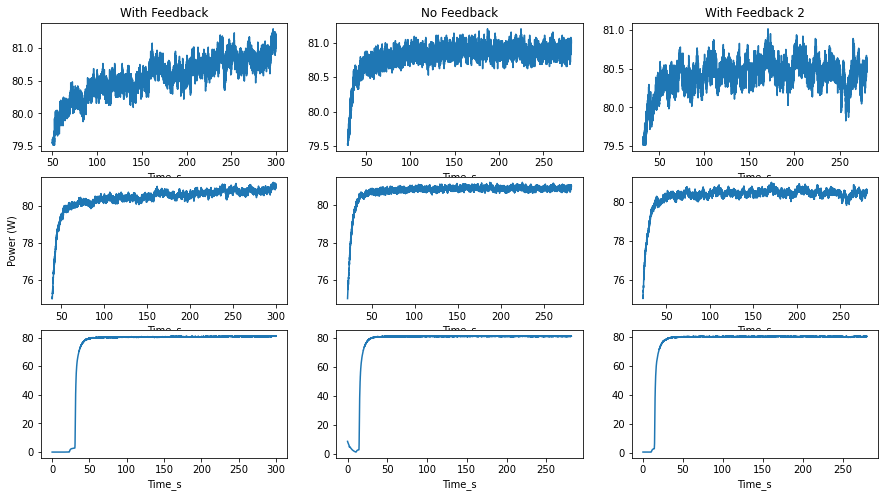

In [38]:
fig, axs = plt.subplots(3,3, figsize=(15,8))

WithFeedback_thr2.Power_W.plot(ax=axs[0,0])
WithFeedback_thr1.Power_W.plot(ax=axs[1,0])
WithFeedback.Power_W.plot(ax=axs[2,0])

NoFeedback_thr2.Power_W.plot(ax=axs[0,1])
NoFeedback_thr1.Power_W.plot(ax=axs[1,1])
NoFeedback.Power_W.plot(ax=axs[2,1])

WithFeedback2_thr2.Power_W.plot(ax=axs[0,2])
WithFeedback2_thr1.Power_W.plot(ax=axs[1,2])
WithFeedback2.Power_W.plot(ax=axs[2,2])

axs[0,0].set_title('With Feedback')
axs[0,1].set_title('No Feedback')
axs[0,2].set_title('With Feedback 2')
axs[1,0].set_ylabel('Power (W)')

In [41]:
WithFeedback2.tail()

,Time_ms,Power_W
Time_s,,
280.13447,280134.47,80.546
280.14647,280146.47,80.561
280.15847,280158.47,80.593
280.17047,280170.47,80.452
280.20647,280206.47,80.640


In [44]:
t1 = 70
t2 = 270
WithFeedback2Plateau = WithFeedback2[ (WithFeedback2.index>=t1) & (WithFeedback2.index<=t2)]
NoFeedbackPlateau = NoFeedback[ (NoFeedback.index>=t1) & (NoFeedback.index<=t2)]

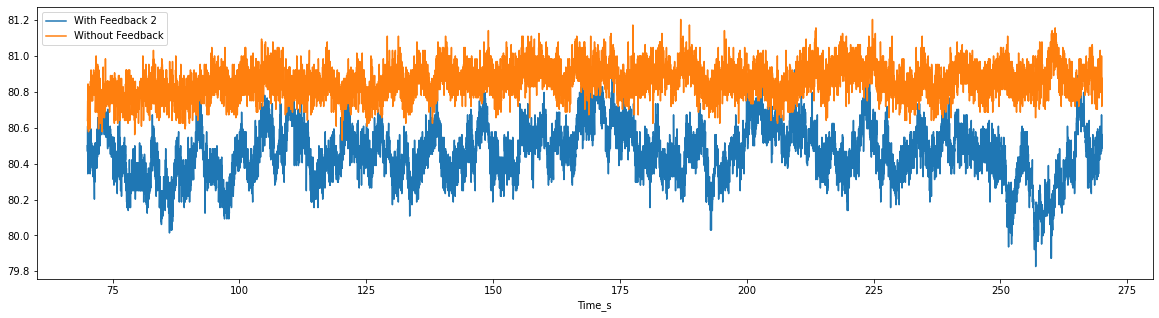

In [60]:
plt.figure(figsize=(20,5))
WithFeedback2Plateau.Power_W.plot()
NoFeedbackPlateau.Power_W.plot()
plt.legend(['With Feedback 2', 'Without Feedback'])

In [49]:
WithFeedback2Plateau.describe()

,Time_ms,Power_W
count,8614.000000,8614.000000
mean,169989.489387,80.460668
std,57736.809447,0.151427
min,70001.470000,79.827000
25%,120068.470000,80.358000
50%,169981.970000,80.452000
75%,219963.220000,80.561000
max,269967.470000,81.015000


In [50]:
NoFeedbackPlateau.describe()

,Time_ms,Power_W
count,8713.000000,8713.000000
mean,170080.462913,80.861891
std,57731.364295,0.087819
min,70028.051000,80.530000
25%,120135.051000,80.796000
50%,170140.051000,80.858000
75%,219990.051000,80.921000
max,269990.051000,81.202000


In [226]:
pd.merge(WithFeedback, NoFeedback)

,Time_ms,Power_W


In [225]:
pd.merge(WithFeedback, NoFeedback, how='outer').iloc[12060:12080]

,Time_ms,Power_W
12060,282269.634,10.78500
12061,282283.634,10.74900
12062,282297.634,10.70900
12063,282308.634,10.68400
12064,282356.634,10.63700
12065,282369.634,10.55200
12066,282411.634,10.53100
12067,282423.634,10.43600
12068,282460.634,10.40200
12069,282473.634,10.33000


In [215]:
WithFeedback

,Time_ms,Power_W
Time_s,,
0.000000,0.000,1.9026
0.012000,12.000,1.9004
0.024000,24.000,1.8998
0.061000,61.000,1.9014
0.073000,73.000,1.9015
...,...,...
282.369634,282369.634,10.5520
282.411634,282411.634,10.5310
282.423634,282423.634,10.4360


In [195]:
NoFeedback.loc[0.037]

Time_ms    37.00000
Power_W     0.51652
Name: 0.037, dtype: float64

array([[<AxesSubplot:xlabel='Time_s'>, <AxesSubplot:xlabel='Time_s'>]],
      dtype=object)

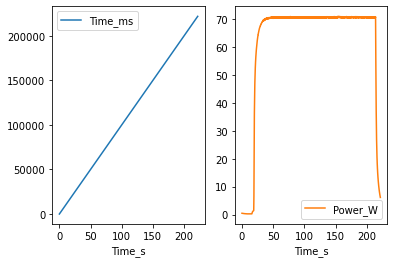

In [201]:
NoFeedback.plot(subplots=1, layout=[1,2])

In [ ]:
Power = pd.DataFrame([WithFeedback.Time_ms, NoFeedback.Time_ms], ind

In [175]:
WithFeedback

,Time_ms,Power_W
0,0.000,1.9026
1,12.000,1.9004
2,24.000,1.8998
3,61.000,1.9014
4,73.000,1.9015
...,...,...
12065,282369.634,10.5520
12066,282411.634,10.5310
12067,282423.634,10.4360
12068,282460.634,10.4020


In [ ]:
WithFeedback.set_index()

In [96]:
WithFeedback

,Time_ms,Power_W,Time_s
0,0.000,1.9026,0.000000
1,12.000,1.9004,0.012000
2,24.000,1.8998,0.024000
3,61.000,1.9014,0.061000
4,73.000,1.9015,0.073000
...,...,...,...
12065,282369.634,10.5520,282.369634
12066,282411.634,10.5310,282.411634
12067,282423.634,10.4360,282.423634
12068,282460.634,10.4020,282.460634


In [227]:
WithFeedback65 = WithFeedback[ WithFeedback['Power_W']>65 ]
NoFeedback65 = NoFeedback[ NoFeedback['Power_W']>65 ]

In [228]:
WithFeedback69 = WithFeedback[ WithFeedback['Power_W']>69 ]
NoFeedback69 = NoFeedback[ NoFeedback['Power_W']>69 ]

<AxesSubplot:xlabel='Time_s'>

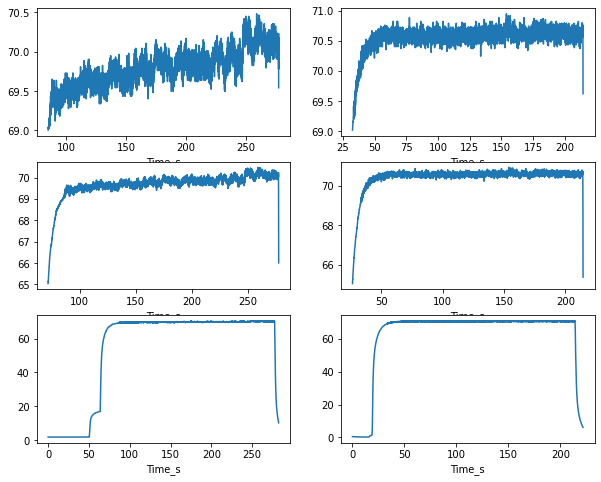

In [235]:
fig, axs = plt.subplots(3,2, figsize=(10,8))

WithFeedback69.Power_W.plot(ax=axs[0,0])
WithFeedback65.Power_W.plot(ax=axs[1,0])
WithFeedback.Power_W.plot(ax=axs[2,0])

NoFeedback69.Power_W.plot(ax=axs[0,1])
NoFeedback65.Power_W.plot(ax=axs[1,1])
NoFeedback.Power_W.plot(ax=axs[2,1])

In [142]:
WithFeedbackPlateau.describe()


,Time_ms,Power_W,Time_s
count,6423.000000,6423.000000,6423.000000
mean,174950.972992,69.768973,174.950973
std,43294.806216,0.172370,43.294806
min,100019.623000,69.276000,100.019623
25%,137523.123000,69.651000,137.523123
50%,174858.623000,69.760000,174.858623
75%,212449.123000,69.885000,212.449123
max,249972.623000,70.448000,249.972623


In [143]:
NoFeedbackPlateau.describe()

,Time_ms,Power_W,Time_s
count,6441.000000,6441.000000,6441.000000
mean,138919.117691,70.602542,138.919118
std,43294.067176,0.080303,43.294067
min,64013.567000,70.245000,64.013567
25%,101343.567000,70.557000,101.343567
50%,138905.567000,70.604000,138.905567
75%,176349.567000,70.651000,176.349567
max,213997.567000,70.948000,213.997567


<AxesSubplot:>

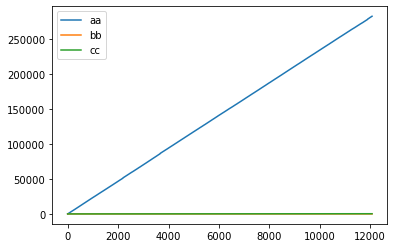

In [153]:
aa.plot()

In [72]:
WithFeedback = pd.read_csv(r'C:\Users\Sommer Lab\Documents\Data\2023\08-2023\31 Aug 2023\With Feedback.CSV', header=1)
WithoutFeedback = pd.read_csv(r'C:\Users\Sommer Lab\Documents\Data\2023\08-2023\31 Aug 2023\Without Feedback.CSV', header=1)

In [73]:
WithFeedback

,Second,Volt,Volt.1
0,-2.0000,0.00048,0.08
1,-1.9999,0.00000,10.16
2,-1.9998,0.00128,0.08
3,-1.9997,0.00168,0.08
4,-1.9996,0.00040,0.08
...,...,...,...
36545,1.6545,0.00008,0.08
36546,1.6546,0.00136,0.08
36547,1.6547,0.00072,0.08
36548,1.6548,0.00048,0.08


<AxesSubplot:>

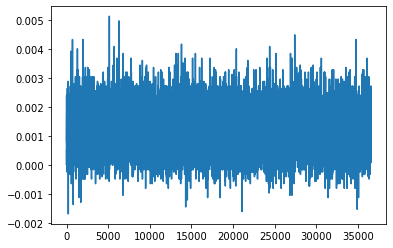

In [75]:
WithFeedback.Volt.plot()

<AxesSubplot:>

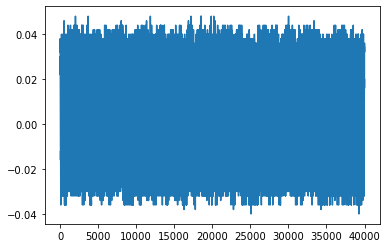

In [76]:
WithoutFeedback.Volt.plot()

In [77]:
WithFeedback.describe()

,Second,Volt,Volt.1
count,36550.000000,36550.000000,36550.000000
mean,-0.172550,0.001202,0.080696
std,1.055122,0.000582,0.053760
min,-2.000000,-0.001680,0.000000
25%,-1.086275,0.000800,0.080000
50%,-0.172550,0.001120,0.080000
75%,0.741175,0.001600,0.080000
max,1.654900,0.005120,10.160000


In [79]:
WithoutFeedback.describe()

,Second,Volt,Volt.1
count,40000.000000,40000.000000,40000.000000
mean,-0.000050,0.003287,6.590848
std,1.154715,0.023858,0.039978
min,-2.000000,-0.040000,5.840000
25%,-1.000025,-0.020000,6.560000
50%,-0.000050,0.004000,6.560000
75%,0.999925,0.026000,6.640000
max,1.999900,0.048000,8.240000
